<a href="https://colab.research.google.com/github/SelahattinNazli/New-Credit-Score-Prediction/blob/main/New_Credit_Risk.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**About Dataset**

**Context**

The consumer credit department of a bank wants to automate the decisionmaking process for approval of home equity lines of credit. To do this, they will follow the recommendations of the **Equal Credit Opportunity Act** to create an empirically derived and statistically sound credit scoring model. The model will be based on data collected from recent applicants granted credit through the current process of loan underwriting. The model will be built from predictive modeling tools, but the created model must be sufficiently interpretable to provide a reason for any adverse actions (rejections).

**Content**

The **HMEQ (Home Equity)** dataset is used to predict whether a loan applicant will default on a home equity loan. It contains information on **5,960** recent home equity loan applications. The target variable is **"BAD"**, which indicates if an applicant eventually defaulted or was seriously delinquent in their loan payments (a binary classification task). About 20% of the applicants defaulted or had serious delinquency.

**Key Columns:**

**BAD**: Binary target variable indicating loan default (1) or non-default (0).

**LOAN:** Amount of the loan request.

**MORTDUE:** Amount due on the existing mortgage.

**VALUE:** Appraised value of the property.

**REASON:** Reason for the loan request (Home improvement or Debt Consolidation).

**JOB:** The job category of the applicant.

**YOJ:** Years on the job.

**DEROG:** Number of major derogatory reports.

**DELINQ:** Number of delinquent credit lines.

**CLAGE:** Age of the oldest credit line in months.

**NINQ:** Number of recent credit inquiries.

**CLNO:** Number of credit lines.

**DEBTINC:** Debt-to-income ratio.

# **1. Import Libraries**

In [ ]:
# Importing necessary libraries and suppressing warnings
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

import io
from google.colab import files
import scipy.stats as stats
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

#**2. Import Libraries**

In [ ]:
# Loading the dataset from a CSV file
df = pd.read_csv('hmeq.csv')
df.head()

,BAD,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC
0,1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN
1,1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN
2,1,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN
3,1,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,NaN


In [ ]:
# Moving the 'BAD' column to the end of the DataFrame
df = df[[col for col in df.columns if col != 'BAD'] + ['BAD']]
df.head()

,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,BAD
0,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN,1
1,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN,1
2,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN,1
3,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
4,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,NaN,0


In [ ]:
# Numeric columns (including int and float types)
df_numeric = df.select_dtypes(include=['int64', 'float64'])

# Categorical columns (including object types, like strings)
df_categoric = df.select_dtypes(include=['object'])

print("Numeric DataFrame:")
print(df_numeric.head())

print("\nCategorical DataFrame:")
print(df_categoric.head())


Numeric DataFrame:
   LOAN  MORTDUE     VALUE   YOJ  DEROG  DELINQ       CLAGE  NINQ  CLNO  \
0  1100  25860.0   39025.0  10.5    0.0     0.0   94.366667   1.0   9.0   
1  1300  70053.0   68400.0   7.0    0.0     2.0  121.833333   0.0  14.0   
2  1500  13500.0   16700.0   4.0    0.0     0.0  149.466667   1.0  10.0   
3  1500      NaN       NaN   NaN    NaN     NaN         NaN   NaN   NaN   
4  1700  97800.0  112000.0   3.0    0.0     0.0   93.333333   0.0  14.0   

   DEBTINC  BAD  
0      NaN    1  
1      NaN    1  
2      NaN    1  
3      NaN    1  
4      NaN    0  

Categorical DataFrame:
    REASON     JOB
0  HomeImp   Other
1  HomeImp   Other
2  HomeImp   Other
3      NaN     NaN
4  HomeImp  Office


# **3. Data Exploration**

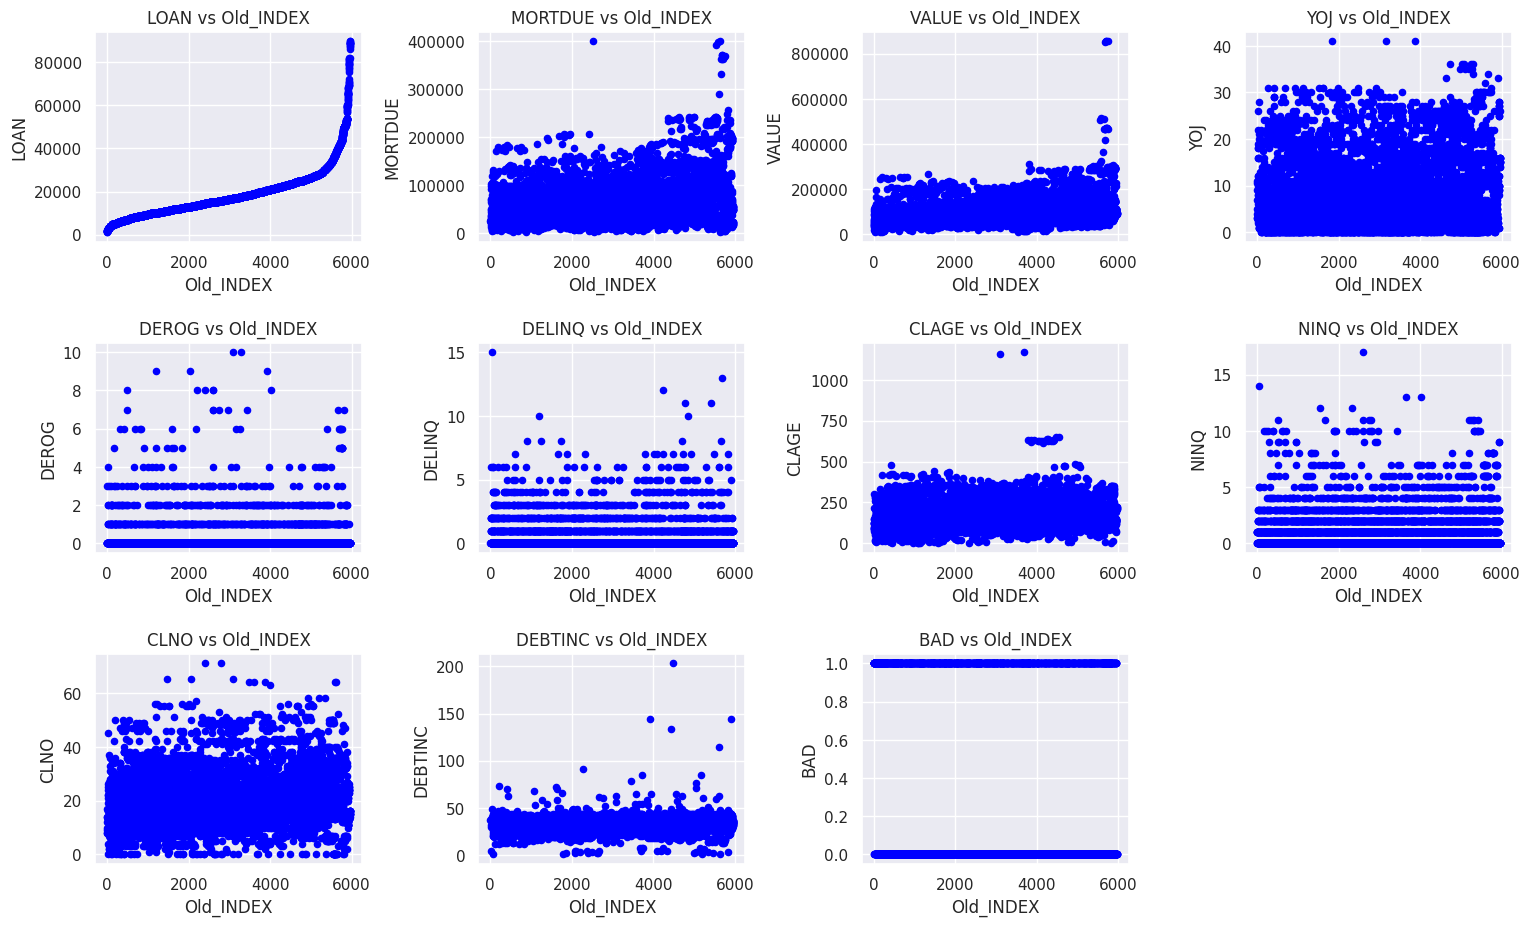

In [71]:
import matplotlib.pyplot as plt
import math

# Reset the index and assign it to a new DataFrame, renaming the old index
df_reset = df.reset_index(names=['Old_INDEX'])  # Rename the old 'INDEX' column to 'Old_INDEX'

# Select numeric columns
numeric_cols = df_reset.select_dtypes(include=['int64', 'float64']).columns

# Remove 'Old_INDEX' from numeric columns if it exists
numeric_cols = [col for col in numeric_cols if col != 'Old_INDEX']

# Define number of rows and columns for the plot grid (3x4 in this case)
n_cols = 4
n_rows = math.ceil(len(numeric_cols) / n_cols)  # Determine number of rows based on the number of numeric columns

# Create a figure and axes
fig, axs = plt.subplots(n_rows, n_cols, figsize=(16, 10))  # Adjust size as needed
fig.tight_layout(pad=4.0)  # Adjust the spacing between plots

# Flatten the axes array for easy indexing
axs = axs.ravel()

# Loop through each numeric column and plot on the corresponding axis
for i, col in enumerate(numeric_cols):
    df_reset.plot(kind='scatter', y=col, x='Old_INDEX', ax=axs[i], title=f'{col} vs Old_INDEX', color='blue')

# Remove any empty subplots (in case there are fewer columns than the grid size)
for j in range(i + 1, len(axs)):
    fig.delaxes(axs[j])

# Display the plots
plt.show()


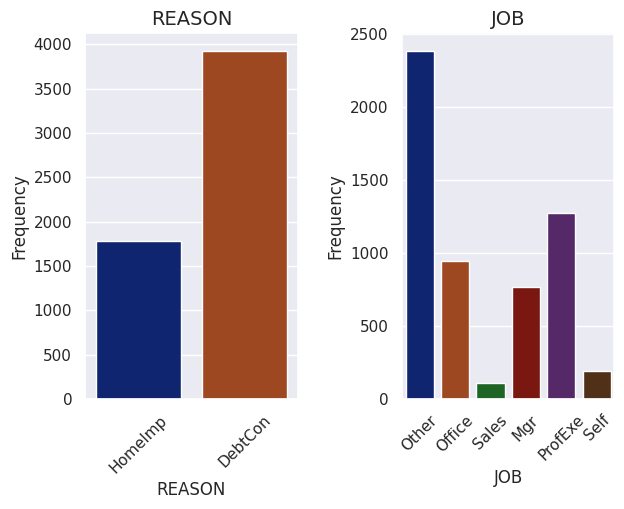

In [74]:
import matplotlib.pyplot as plt
import seaborn as sns
import math

# Number of columns for the plot grid (e.g., 3 plots per row)
n_cols = 3
n_rows = math.ceil(len(df_categoric.columns) / n_cols)  # Determine the number of rows

# Create a figure and axes for the grid of subplots
fig, axs = plt.subplots(n_rows, n_cols, figsize=(10, 5))  # Adjust size as needed
fig.tight_layout(pad=3.0)  # Adjust the spacing between plots

# Flatten the axes array for easy indexing
axs = axs.ravel()

# Loop through each categorical column and create the count plot in each subplot
for i, col in enumerate(df_categoric.columns):
    sns.countplot(x=df_categoric[col], ax=axs[i], palette='dark')
    axs[i].set_title(f'{col}', fontsize=14)
    axs[i].set_xlabel(col, fontsize=12)
    axs[i].set_ylabel('Frequency', fontsize=12)
    axs[i].tick_params(axis='x', rotation=45)  # Rotate x-axis labels for better readability

# Remove any empty subplots (in case the number of categories is less than the grid size)
for j in range(i + 1, len(axs)):
    fig.delaxes(axs[j])

# Display the plots
plt.show()


<function matplotlib.pyplot.show(close=None, block=None)>

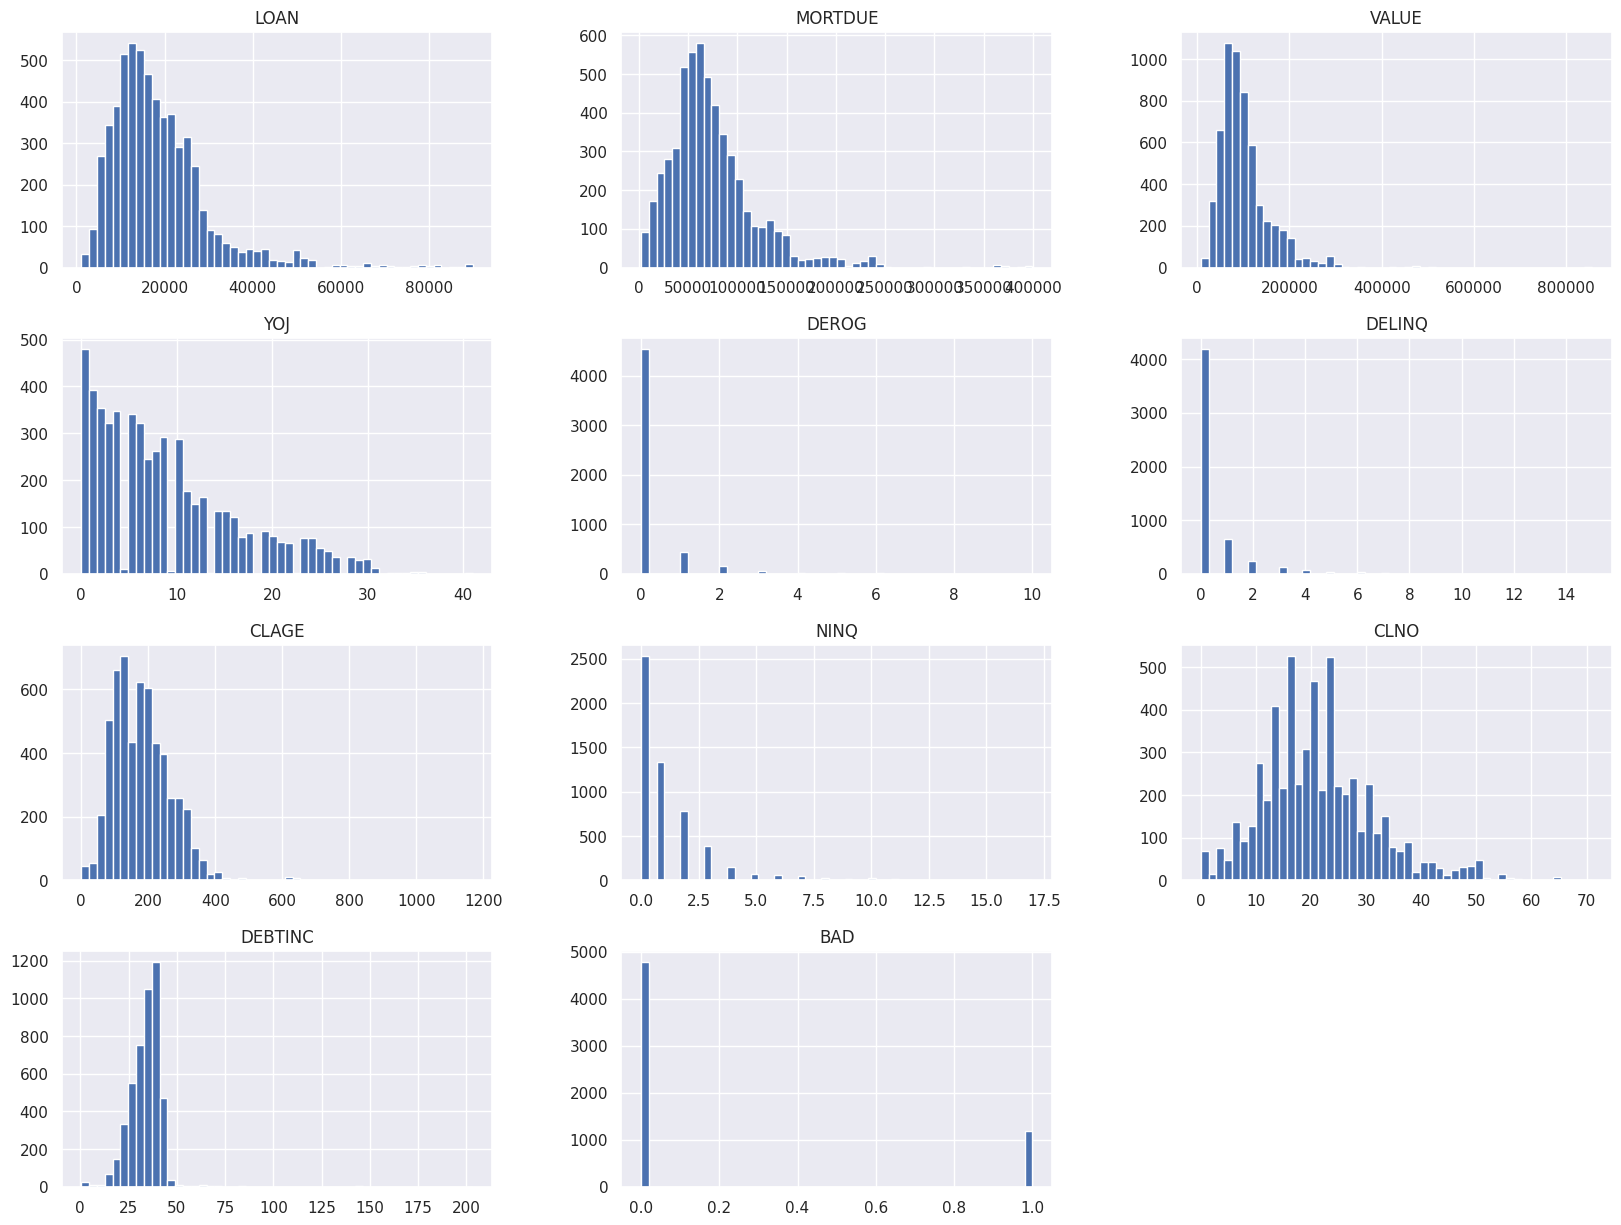

In [75]:
df.hist(bins=50, figsize=(20,15))
plt.show

In [76]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5960 entries, 0 to 5959
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   LOAN     5960 non-null   int64  
 1   MORTDUE  5442 non-null   float64
 2   VALUE    5848 non-null   float64
 3   REASON   5708 non-null   object 
 4   JOB      5681 non-null   object 
 5   YOJ      5445 non-null   float64
 6   DEROG    5252 non-null   float64
 7   DELINQ   5380 non-null   float64
 8   CLAGE    5652 non-null   float64
 9   NINQ     5450 non-null   float64
 10  CLNO     5738 non-null   float64
 11  DEBTINC  4693 non-null   float64
 12  BAD      5960 non-null   int64  
dtypes: float64(9), int64(2), object(2)
memory usage: 605.4+ KB


In [ ]:
df['INDEX'] = range(1,len(df)+1)
df.set_index('INDEX',inplace = True)
df.head()

,LOAN,MORTDUE,VALUE,REASON,JOB,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,BAD
INDEX,,,,,,,,,,,,,
1,1100,25860.0,39025.0,HomeImp,Other,10.5,0.0,0.0,94.366667,1.0,9.0,NaN,1
2,1300,70053.0,68400.0,HomeImp,Other,7.0,0.0,2.0,121.833333,0.0,14.0,NaN,1
3,1500,13500.0,16700.0,HomeImp,Other,4.0,0.0,0.0,149.466667,1.0,10.0,NaN,1
4,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
5,1700,97800.0,112000.0,HomeImp,Office,3.0,0.0,0.0,93.333333,0.0,14.0,NaN,0


In [ ]:
df.describe()

,LOAN,MORTDUE,VALUE,YOJ,DEROG,DELINQ,CLAGE,NINQ,CLNO,DEBTINC,BAD
count,5960.000000,5442.000000,5848.000000,5445.000000,5252.000000,5380.000000,5652.000000,5450.000000,5738.000000,4693.000000,5960.000000
mean,18607.969799,73760.817200,101776.048741,8.922268,0.254570,0.449442,179.766275,1.186055,21.296096,33.779915,0.199497
std,11207.480417,44457.609458,57385.775334,7.573982,0.846047,1.127266,85.810092,1.728675,10.138933,8.601746,0.399656
min,1100.000000,2063.000000,8000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.524499,0.000000
25%,11100.000000,46276.000000,66075.500000,3.000000,0.000000,0.000000,115.116702,0.000000,15.000000,29.140031,0.000000
50%,16300.000000,65019.000000,89235.500000,7.000000,0.000000,0.000000,173.466667,1.000000,20.000000,34.818262,0.000000
75%,23300.000000,91488.000000,119824.250000,13.000000,0.000000,0.000000,231.562278,2.000000,26.000000,39.003141,0.000000
max,89900.000000,399550.000000,855909.000000,41.000000,10.000000,15.000000,1168.233561,17.000000,71.000000,203.312149,1.000000


In [91]:
# Creating Correlation matrix
correlation_matrix = df_numeric.corr()


print("Correlation matrix:")
print(correlation_matrix)


Correlation matrix:
             LOAN   MORTDUE     VALUE       YOJ     DEROG    DELINQ     CLAGE  \
LOAN     1.000000  0.228595  0.335393  0.105728 -0.001302 -0.035144  0.088540   
MORTDUE  0.228595  1.000000  0.875666 -0.088480 -0.049516 -0.001044  0.140047   
VALUE    0.335393  0.875666  1.000000  0.007759 -0.048689 -0.014103  0.171238   
YOJ      0.105728 -0.088480  0.007759  1.000000 -0.065879  0.038153  0.201718   
DEROG   -0.001302 -0.049516 -0.048689 -0.065879  1.000000  0.211832 -0.083047   
DELINQ  -0.035144 -0.001044 -0.014103  0.038153  0.211832  1.000000  0.022488   
CLAGE    0.088540  0.140047  0.171238  0.201718 -0.083047  0.022488  1.000000   
NINQ     0.044487  0.031392 -0.004398 -0.071627  0.173934  0.067812 -0.116935   
CLNO     0.072631  0.323631  0.269149  0.024838  0.061884  0.164639  0.237987   
DEBTINC  0.084735  0.154939  0.132174 -0.055891  0.017065  0.052364 -0.046477   
BAD     -0.075099 -0.048219 -0.029954 -0.060238  0.276081  0.354107 -0.170499   

       

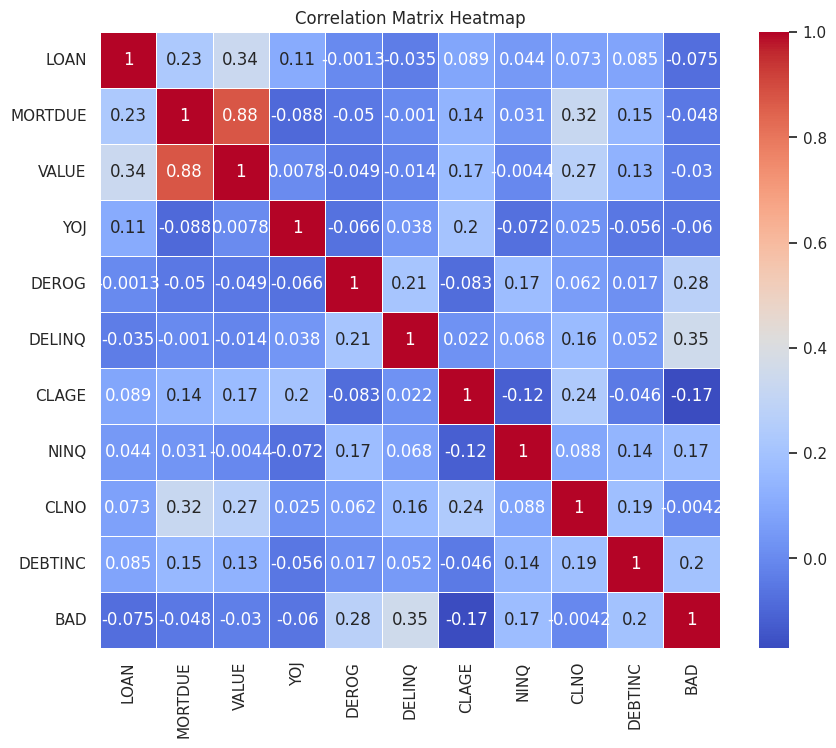

In [92]:
import seaborn as sns
import matplotlib.pyplot as plt


plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()


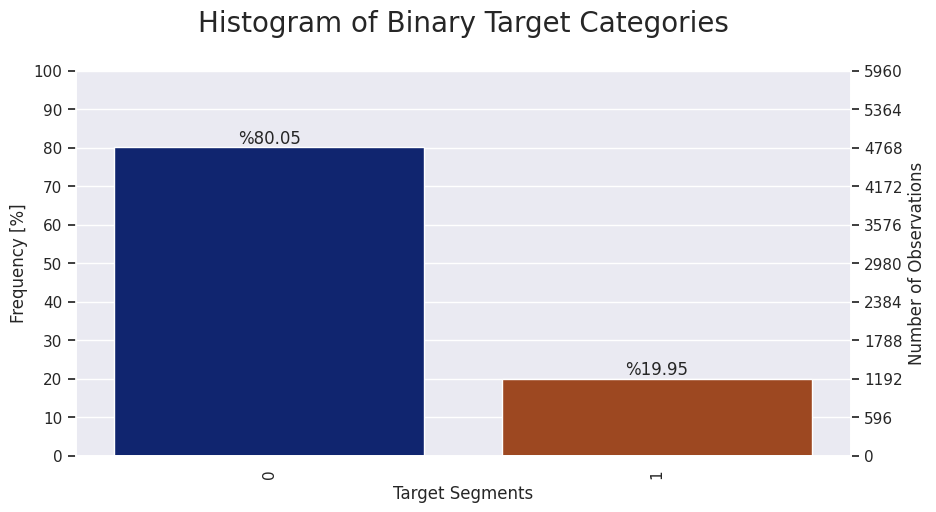

In [77]:
from matplotlib.ticker import FormatStrFormatter
import psutil
import os
import scipy as sp
import matplotlib.ticker as ticker
import seaborn as sns

def Histogram(data, variable):
    ncount = len(data)

    # Creating the count plot
    ax = sns.countplot(x=variable, data=data, palette='dark')
    sns.set(font_scale=1)
    ax.set_xlabel('Target Segments')

    # Rotate x-axis labels for better readability
    plt.xticks(rotation=90)
    ax.set_ylabel('Number of Observations')

    fig = plt.gcf()
    fig.set_size_inches(10, 5)

    # Create a secondary y-axis for the frequency percentage
    ax2 = ax.twinx()
    ax2.yaxis.tick_left()
    ax.yaxis.tick_right()
    ax.yaxis.set_label_position('right')
    ax2.yaxis.set_label_position('left')
    ax2.set_ylabel('Frequency [%]')

    # Adding percentage annotations on top of the bars
    for p in ax.patches:
        x = p.get_bbox().get_points()[:, 0]
        y = p.get_bbox().get_points()[1, 1]
        ax.annotate('%{:.2f}'.format(100. * y / ncount), (x.mean(), y),
                    ha='center', va='bottom')

    # Use LinearLocator for consistent tick intervals
    ax.yaxis.set_major_locator(ticker.LinearLocator(11))

    # Set the frequency range from 0 to 100%
    ax2.set_ylim(0, 100)
    ax.set_ylim(0, ncount)

    # Use MultipleLocator to ensure tick spacing of 10% on the secondary y-axis
    ax2.yaxis.set_major_locator(ticker.MultipleLocator(10))

    # Disable the gridlines on the secondary y-axis to prevent overlap
    ax2.grid(None)

    # Set the title for the plot
    plt.title('Histogram of Binary Target Categories', fontsize=20, y=1.08)

    plt.show()
    #plt.savefig('col.png')

    # Clean up variables after plotting
    del ncount, x, y

# Call the function to plot the histogram for the 'BAD' column
Histogram(df, 'BAD')


#**4. Data Cleaning**

In [84]:
df.shape


(5960, 13)

In [86]:
data_filtered = df[df["CLAGE"]<750]
data_filtered.shape

(5650, 13)

In [87]:
data_filtered.isna().sum()

,0
LOAN,0
MORTDUE,413
VALUE,93
REASON,146
JOB,125
YOJ,381
DEROG,486
DELINQ,358
CLAGE,0
NINQ,288


In [95]:

df['missing_percentage'] = df.isnull().sum(axis=1) / len(df.columns) * 100


print(df[['missing_percentage']].sort_values(by='missing_percentage', ascending=False).head(10))


      missing_percentage
333            64.285714
3839           64.285714
489            64.285714
3151           64.285714
608            64.285714
...                  ...
2684            0.000000
2686            0.000000
2688            0.000000
2691            0.000000
5959            0.000000

[5960 rows x 1 columns]


In [98]:
# Remove rows with more than 60% missing data
df_cleaned = df[df['missing_percentage'] < 60]

# Drop the 'missing_percentage' column
df_cleaned.drop(columns=['missing_percentage'], inplace=True)

# Display the cleaned dataset
print(f"Removed {len(df) - len(df_cleaned)} rows with more than 60% missing data.")
print(df_cleaned.head())



Removed 12 rows with more than 60% missing data.
   LOAN  MORTDUE     VALUE   REASON     JOB   YOJ  DEROG  DELINQ       CLAGE  \
0  1100  25860.0   39025.0  HomeImp   Other  10.5    0.0     0.0   94.366667   
1  1300  70053.0   68400.0  HomeImp   Other   7.0    0.0     2.0  121.833333   
2  1500  13500.0   16700.0  HomeImp   Other   4.0    0.0     0.0  149.466667   
4  1700  97800.0  112000.0  HomeImp  Office   3.0    0.0     0.0   93.333333   
5  1700  30548.0   40320.0  HomeImp   Other   9.0    0.0     0.0  101.466002   

   NINQ  CLNO    DEBTINC  BAD  
0   1.0   9.0        NaN    1  
1   0.0  14.0        NaN    1  
2   1.0  10.0        NaN    1  
4   0.0  14.0        NaN    0  
5   1.0   8.0  37.113614    1  


In [100]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5948 entries, 0 to 5959
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   LOAN     5948 non-null   int64  
 1   MORTDUE  5948 non-null   float64
 2   VALUE    5948 non-null   float64
 3   REASON   5708 non-null   object 
 4   JOB      5681 non-null   object 
 5   YOJ      5445 non-null   float64
 6   DEROG    5252 non-null   float64
 7   DELINQ   5380 non-null   float64
 8   CLAGE    5652 non-null   float64
 9   NINQ     5450 non-null   float64
 10  CLNO     5738 non-null   float64
 11  DEBTINC  4693 non-null   float64
 12  BAD      5948 non-null   int64  
dtypes: float64(9), int64(2), object(2)
memory usage: 650.6+ KB


In [101]:
df = df_cleaned


In [104]:
# Fill missing values in the 'VALUE' column with the median
df['VALUE'].fillna(df['VALUE'].median(), inplace=True)

# Check if there are any missing values left
print(df['VALUE'].isnull().sum())  # This will print 0 if all missing values are filled


0


In [107]:
# Imputation for numerical columns using median
numerical_columns = ['YOJ', 'DEROG', 'DELINQ', 'CLAGE', 'NINQ', 'CLNO', 'DEBTINC']

for col in numerical_columns:
    # Fill missing values with the median of the column
    df[col].fillna(df[col].median(), inplace=True)

# Check if there are any missing values left in the numerical columns
print(f"Missing values in numerical columns:")
print(df[numerical_columns].isnull().sum())

# Imputation for categorical columns using mode
categorical_columns = ['REASON', 'JOB']

for col in categorical_columns:
    # Fill missing values with the mode (most frequent value) of the column
    df[col].fillna(df[col].mode()[0], inplace=True)

# Check if there are any missing values left in the categorical columns
print(f"\nMissing values in categorical columns:")
print(df[categorical_columns].isnull().sum())

# Final check for missing values in the entire dataset
print("\nFinal check for any missing values in the dataset:")
print(df.isnull().sum())


Missing values in numerical columns:
YOJ        0
DEROG      0
DELINQ     0
CLAGE      0
NINQ       0
CLNO       0
DEBTINC    0
dtype: int64

Missing values in categorical columns:
REASON    0
JOB       0
dtype: int64

Final check for any missing values in the dataset:
LOAN       0
MORTDUE    0
VALUE      0
REASON     0
JOB        0
YOJ        0
DEROG      0
DELINQ     0
CLAGE      0
NINQ       0
CLNO       0
DEBTINC    0
BAD        0
dtype: int64


In [108]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5948 entries, 0 to 5959
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   LOAN     5948 non-null   int64  
 1   MORTDUE  5948 non-null   float64
 2   VALUE    5948 non-null   float64
 3   REASON   5948 non-null   object 
 4   JOB      5948 non-null   object 
 5   YOJ      5948 non-null   float64
 6   DEROG    5948 non-null   float64
 7   DELINQ   5948 non-null   float64
 8   CLAGE    5948 non-null   float64
 9   NINQ     5948 non-null   float64
 10  CLNO     5948 non-null   float64
 11  DEBTINC  5948 non-null   float64
 12  BAD      5948 non-null   int64  
dtypes: float64(9), int64(2), object(2)
memory usage: 650.6+ KB


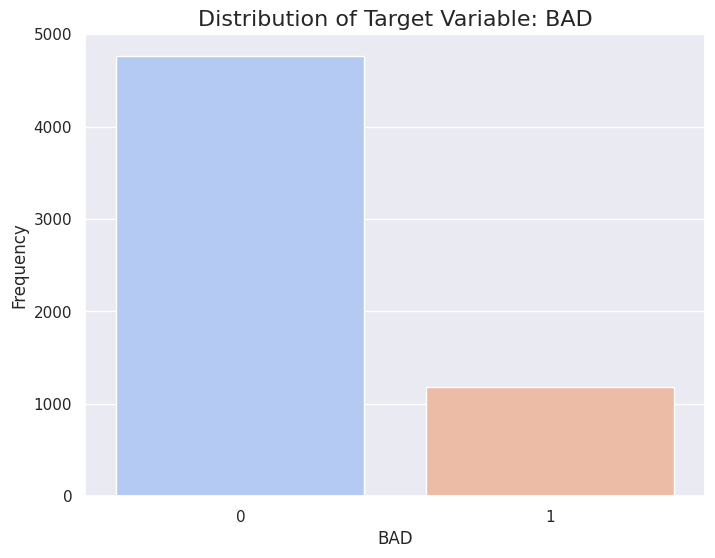

In [113]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the distribution of the target variable 'BAD'
plt.figure(figsize=(8, 6))
sns.countplot(x='BAD', data=df, palette='coolwarm')
plt.title('Distribution of Target Variable: BAD', fontsize=16)
plt.xlabel('BAD', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.show()


#**5. Encoding**

In this dataset, the target variable 'BAD' has an imbalanced class distribution, with one class significantly underrepresented compared to the other.
 This imbalance can negatively affect the model's ability to learn and predict the minority class (in this case, 'BAD' = 1).
 To address this issue, we apply the SMOTE (Synthetic Minority Over-sampling Technique) method, which generates synthetic examples of the minority class.

By balancing the dataset using SMOTE, we aim to improve the model's performance by ensuring that both classes are equally represented during training.

In [112]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from imblearn.over_sampling import SMOTE

# Step 1: One-Hot Encoding for categorical columns
df_encoded = pd.get_dummies(df, columns=['REASON', 'JOB'], drop_first=True)

# Step 2: Define the features (X) and the target (y)
X = df_encoded.drop(columns=['BAD'])  # Features (all columns except the target)
y = df_encoded['BAD']  # Target variable (BAD)

# Step 3: Apply SMOTE to balance the classes
smote = SMOTE(random_state=42)
X_smote, y_smote = smote.fit_resample(X, y)

# Step 4: Check the class distribution after SMOTE
print(y_smote.value_counts())


BAD
1    4762
0    4762
Name: count, dtype: int64


In [133]:
df_encoded.columns


Index(['LOAN', 'MORTDUE', 'VALUE', 'YOJ', 'DEROG', 'DELINQ', 'CLAGE', 'NINQ',
       'CLNO', 'DEBTINC', 'BAD', 'REASON_HomeImp', 'JOB_Office', 'JOB_Other',
       'JOB_ProfExe', 'JOB_Sales', 'JOB_Self'],
      dtype='object')

 In this dataset, the target variable 'BAD' has an imbalanced class distribution, with one class significantly underrepresented compared to the other.
 This imbalance can negatively affect the model's ability to learn and predict the minority class (in this case, 'BAD' = 1).
 To address this issue, we apply the SMOTE (Synthetic Minority Over-sampling Technique) method, which generates synthetic examples of the minority class.

By balancing the dataset using SMOTE, we aim to improve the model's performance by ensuring that both classes are equally represented during training.


# **6. Scaling**

In [116]:
from sklearn.preprocessing import StandardScaler
# Step 4: Apply scaling (StandardScaler)
scaler = StandardScaler()
X_smote_scaled = scaler.fit_transform(X_smote)

# X_smote_scaled is now ready for model training


# **7. Modeling**

In [117]:
from sklearn.model_selection import train_test_split

# Step 1: Split the data into training+validation and test sets (80% train+validation, 20% test)
X_train_val, X_test, y_train_val, y_test = train_test_split(X_smote_scaled, y_smote, test_size=0.2, random_state=42)

# Step 2: Split the training+validation data into training and validation sets (75% train, 25% validation)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)

# Print the shapes of the resulting sets
print(f"Training set shape: {X_train.shape}")
print(f"Validation set shape: {X_val.shape}")
print(f"Test set shape: {X_test.shape}")


Training set shape: (5714, 16)
Validation set shape: (1905, 16)
Test set shape: (1905, 16)


Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.78      0.83      0.80       958
           1       0.82      0.76      0.79       947

    accuracy                           0.80      1905
   macro avg       0.80      0.80      0.80      1905
weighted avg       0.80      0.80      0.80      1905

Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       958
           1       0.97      0.94      0.96       947

    accuracy                           0.96      1905
   macro avg       0.96      0.96      0.96      1905
weighted avg       0.96      0.96      0.96      1905

Classification Report for SVM:
              precision    recall  f1-score   support

           0       0.85      0.91      0.88       958
           1       0.90      0.83      0.87       947

    accuracy                           0.87      1905
   macro 

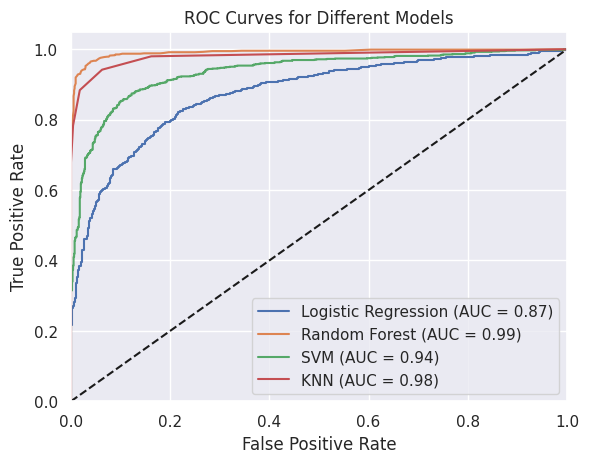

In [119]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Step 1: Split the data into training, validation, and test sets
X_train_val, X_test, y_train_val, y_test = train_test_split(X_smote_scaled, y_smote, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)

# Step 2: Initialize the models
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(probability=True),  # SVM with probability=True to get ROC curve
    'KNN': KNeighborsClassifier()
}

# Step 3: Train and evaluate each model
for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Predict on the validation set
    y_pred = model.predict(X_val)

    # Predict probabilities for ROC curve
    y_pred_proba = model.predict_proba(X_val)[:, 1] if hasattr(model, "predict_proba") else model.decision_function(X_val)

    # Classification report
    print(f"Classification Report for {name}:")
    print(classification_report(y_val, y_pred))

    # ROC curve
    fpr, tpr, _ = roc_curve(y_val, y_pred_proba)
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc_score(y_val, y_pred_proba):.2f})')

# Step 4: Plot ROC curves for all models
plt.plot([0, 1], [0, 1], 'k--')  # Diagonal line for reference
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Different Models')
plt.legend(loc="lower right")
plt.show()


In [120]:
# For each model, check training and validation performance
for name, model in models.items():
    # Training set performance
    y_train_pred = model.predict(X_train)
    print(f"Training Set Performance for {name}:")
    print(classification_report(y_train, y_train_pred))

    # Validation set performance
    y_val_pred = model.predict(X_val)
    print(f"Validation Set Performance for {name}:")
    print(classification_report(y_val, y_val_pred))


Training Set Performance for Logistic Regression:
              precision    recall  f1-score   support

           0       0.77      0.84      0.80      2843
           1       0.83      0.75      0.79      2871

    accuracy                           0.80      5714
   macro avg       0.80      0.80      0.80      5714
weighted avg       0.80      0.80      0.80      5714

Validation Set Performance for Logistic Regression:
              precision    recall  f1-score   support

           0       0.78      0.83      0.80       958
           1       0.82      0.76      0.79       947

    accuracy                           0.80      1905
   macro avg       0.80      0.80      0.80      1905
weighted avg       0.80      0.80      0.80      1905

Training Set Performance for Random Forest:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      2843
           1       1.00      1.00      1.00      2871

    accuracy                        

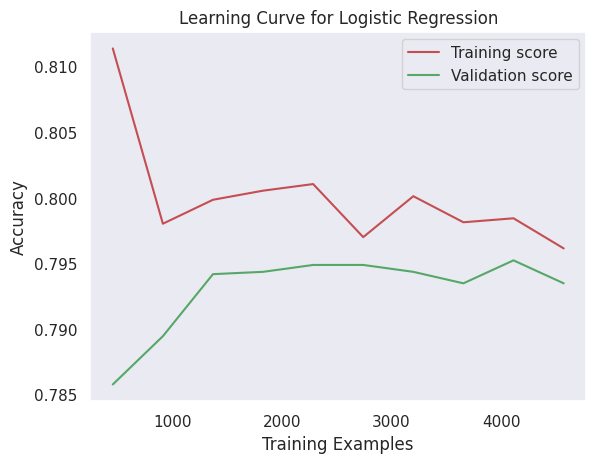

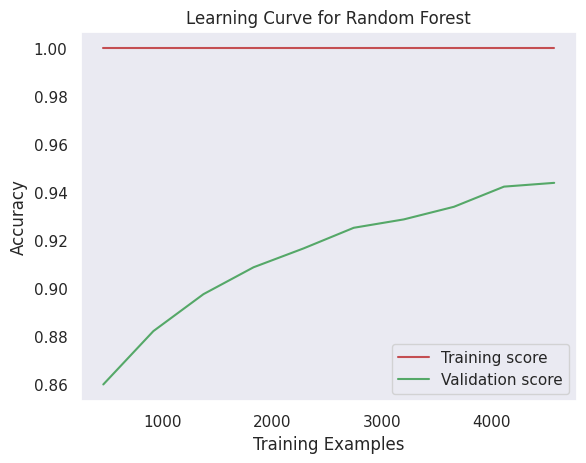

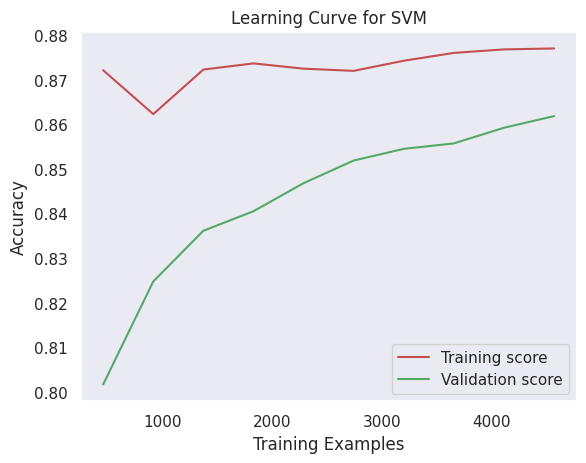

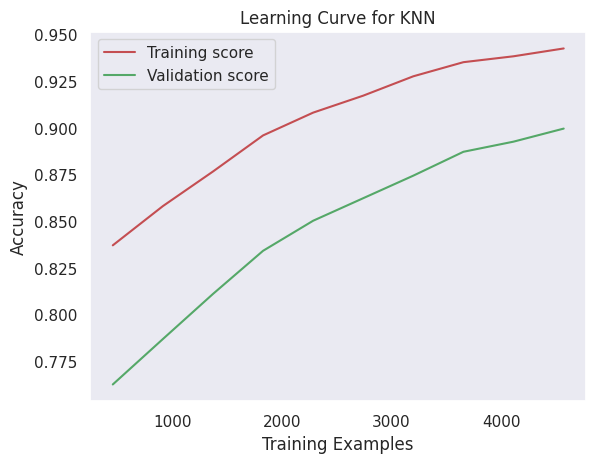

In [122]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import learning_curve
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Split the data into training, validation, and test sets
X_train_val, X_test, y_train_val, y_test = train_test_split(X_smote_scaled, y_smote, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)

# Define a function to plot learning curves
def plot_learning_curve(model, model_name, X_train, y_train):
    train_sizes, train_scores, val_scores = learning_curve(model, X_train, y_train, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10))

    # Calculate mean and std for training and validation scores
    train_scores_mean = np.mean(train_scores, axis=1)
    val_scores_mean = np.mean(val_scores, axis=1)

    # Plot learning curve
    plt.figure()
    plt.plot(train_sizes, train_scores_mean, label="Training score", color="r")
    plt.plot(train_sizes, val_scores_mean, label="Validation score", color="g")
    plt.title(f'Learning Curve for {model_name}')
    plt.xlabel('Training Examples')
    plt.ylabel('Accuracy')
    plt.legend(loc="best")
    plt.grid()
    plt.show()

# Define the models
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'KNN': KNeighborsClassifier()
}

# Plot learning curves for each model
for name, model in models.items():
    plot_learning_curve(model, name, X_train, y_train)


# **Regularization**

In [124]:
from sklearn.model_selection import RandomizedSearchCV
import numpy as np

# Define the parameter grid for RandomizedSearchCV
param_dist = {
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'n_estimators': [100, 200, 300]
}

# Initialize Random Forest model
rf = RandomForestClassifier(random_state=42)

# RandomizedSearchCV with 10 random parameter combinations
random_search = RandomizedSearchCV(estimator=rf, param_distributions=param_dist, n_iter=10, cv=3, scoring='roc_auc', n_jobs=-1, verbose=2, random_state=42)
random_search.fit(X_train, y_train)

# Print the best parameters and AUC score
print("Best parameters found:", random_search.best_params_)
print("Best AUC score:", random_search.best_score_)


Fitting 3 folds for each of 10 candidates, totalling 30 fits
Best parameters found: {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': None}
Best AUC score: 0.9853414664056324


In [127]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, roc_auc_score

# Step 1: Use the best found Random Forest model parameters
best_rf_model = RandomForestClassifier(n_estimators=300, min_samples_split=2, min_samples_leaf=1, max_depth=None, random_state=42)

# Step 2: Define the models
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': best_rf_model,  # The optimized Random Forest model
    'SVM': SVC(probability=True),  # Use probability=True for ROC AUC
    'KNN': KNeighborsClassifier()
}

# Step 3: Train each model
for name, model in models.items():
    model.fit(X_train, y_train)

# Step 4: Evaluate all models on validation set
for name, model in models.items():
    # Predict on validation set
    y_val_pred = model.predict(X_val)

    # ROC AUC score
    if hasattr(model, "predict_proba"):
        y_val_proba = model.predict_proba(X_val)[:, 1]
        auc = roc_auc_score(y_val, y_val_proba)
    else:
        y_val_proba = model.decision_function(X_val)
        auc = roc_auc_score(y_val, y_val_proba)

    # Print evaluation metrics
    print(f"--- {name} ---")
    print("Classification Report:")
    print(classification_report(y_val, y_val_pred))
    print(f"ROC AUC Score: {auc:.2f}")
    print("\n")


--- Logistic Regression ---
Classification Report:
              precision    recall  f1-score   support

           0       0.78      0.83      0.80       958
           1       0.82      0.76      0.79       947

    accuracy                           0.80      1905
   macro avg       0.80      0.80      0.80      1905
weighted avg       0.80      0.80      0.80      1905

ROC AUC Score: 0.87


--- Random Forest ---
Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96       958
           1       0.97      0.95      0.96       947

    accuracy                           0.96      1905
   macro avg       0.96      0.96      0.96      1905
weighted avg       0.96      0.96      0.96      1905

ROC AUC Score: 0.99


--- SVM ---
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.91      0.88       958
           1       0.90      0.83      0.87       947

    acc

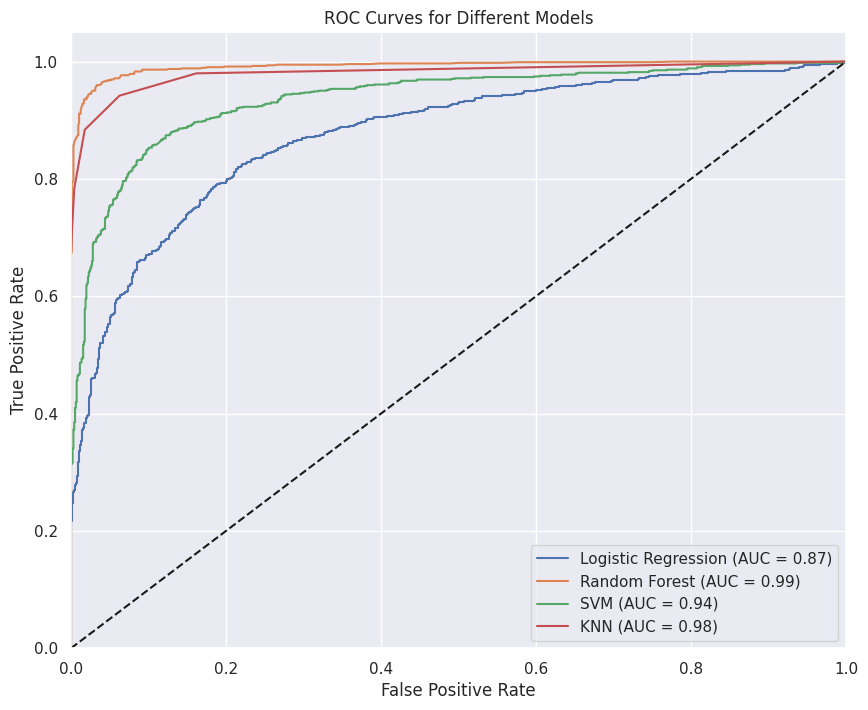

In [128]:
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, roc_auc_score, roc_curve

# Step 1: Use the best found Random Forest model parameters
best_rf_model = RandomForestClassifier(n_estimators=300, min_samples_split=2, min_samples_leaf=1, max_depth=None, random_state=42)

# Step 2: Define the models
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': best_rf_model,  # The optimized Random Forest model
    'SVM': SVC(probability=True),  # Use probability=True for ROC AUC
    'KNN': KNeighborsClassifier()
}

# Step 3: Train each model
for name, model in models.items():
    model.fit(X_train, y_train)

# Step 4: Initialize a plot for ROC Curves
plt.figure(figsize=(10, 8))

# Step 5: Evaluate all models on validation set and plot ROC curves
for name, model in models.items():
    # Predict probabilities for ROC curve
    if hasattr(model, "predict_proba"):
        y_val_proba = model.predict_proba(X_val)[:, 1]
    else:
        y_val_proba = model.decision_function(X_val)

    # Calculate ROC curve
    fpr, tpr, _ = roc_curve(y_val, y_val_proba)

    # Plot ROC curve
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc_score(y_val, y_val_proba):.2f})')

# Step 6: Plot a reference diagonal line for random guessing
plt.plot([0, 1], [0, 1], 'k--')

# Set plot labels and title
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Different Models')
plt.legend(loc="lower right")

# Show the plot
plt.show()


## **Test Set Analysis**

In [129]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, roc_auc_score

# Step 1: Use the best found Random Forest model parameters
best_rf_model = RandomForestClassifier(n_estimators=300, min_samples_split=2, min_samples_leaf=1, max_depth=None, random_state=42)

# Step 2: Define the models
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': best_rf_model,  # The optimized Random Forest model
    'SVM': SVC(probability=True),  # Use probability=True for ROC AUC
    'KNN': KNeighborsClassifier()
}

# Step 3: Train each model
for name, model in models.items():
    model.fit(X_train, y_train)

# Step 4: Evaluate the best model on the test set
for name, model in models.items():
    # Predict on test set
    y_test_pred = model.predict(X_test)

    # ROC AUC score
    if hasattr(model, "predict_proba"):
        y_test_proba = model.predict_proba(X_test)[:, 1]
        auc = roc_auc_score(y_test, y_test_proba)
    else:
        y_test_proba = model.decision_function(X_test)
        auc = roc_auc_score(y_test, y_test_proba)

    # Print evaluation metrics for the test set
    print(f"--- {name} ---")
    print("Test Set Classification Report:")
    print(classification_report(y_test, y_test_pred))
    print(f"Test Set ROC AUC Score: {auc:.2f}")
    print("\n")


--- Logistic Regression ---
Test Set Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.80      0.79       961
           1       0.79      0.76      0.77       944

    accuracy                           0.78      1905
   macro avg       0.78      0.78      0.78      1905
weighted avg       0.78      0.78      0.78      1905

Test Set ROC AUC Score: 0.86


--- Random Forest ---
Test Set Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.95      0.95       961
           1       0.95      0.94      0.95       944

    accuracy                           0.95      1905
   macro avg       0.95      0.95      0.95      1905
weighted avg       0.95      0.95      0.95      1905

Test Set ROC AUC Score: 0.99


--- SVM ---
Test Set Classification Report:
              precision    recall  f1-score   support

           0       0.84      0.89      0.87       961
           1     

**1.Logistic Regression:**
**Accuracy:** 78%, which is decent, but lower compared to other models.
Precision: 77% for class 0 and 79% for class 1. This shows the model is fairly good at minimizing false positives.
**Recall:** 80% for class 0 and 76% for class 1, meaning the model is reasonably good at detecting true positives.
**F1-Score:** Around 78%, showing a balance between precision and recall.
**ROC AUC Score:** 0.86, indicating the model has a decent ability to distinguish between the two classes, but lower compared to the other models.
**Overall Evaluation:** Logistic Regression performs fairly well as a baseline model, but its performance is not as strong as the more advanced models, especially when handling imbalanced datasets.

**2. Random Forest:**
**Accuracy:** 95%, which is very high.
**Precision:** 94% for class 0 and 95% for class 1, showing that the model is excellent at minimizing false positives.
**Recall: **95% for class 0 and 94% for class 1, indicating the model is very good at detecting true positives.
**F1-Score:** 95%, showing an excellent balance between precision and recall.
**ROC AUC Score:** 0.99, indicating the model has an almost perfect ability to distinguish between the two classes.
**Overall Evaluation:** Random Forest clearly performs the best among all models, with excellent accuracy, precision, recall, and ROC AUC. It appears to be the top-performing model.

**3. SVM (Support Vector Machine):**
**Accuracy:** 86%, which is reasonable.
**Precision:** 84% for class 0 and 88% for class 1, showing the model is fairly good at avoiding false positives.
**Recall:** 89% for class 0 and 82% for class 1, meaning the model detects class 0 better than class 1.
**F1-Score:** Around 85%.
**ROC AUC Score:** 0.94, which indicates good separation between the two classes.
**Overall Evaluation:** SVM performs well but not as strongly as Random Forest. It has good overall metrics but lags slightly behind in both accuracy and ROC AUC.

**4. K-Nearest Neighbors (KNN):**
**Accuracy:** 94%, which is very high.
**Precision: **91% for class 0 and 98% for class 1, meaning the model is particularly good at avoiding false positives for class 1.
**Recall:** 98% for class 0 and 90% for class 1, indicating the model does a great job identifying class 0 and performs well for class 1 too.
**F1-Score:** 94%, showing a strong balance between precision and recall.
**ROC AUC Score:** 0.98, indicating a very strong ability to distinguish between the two classes.
**Overall Evaluation:** KNN performs almost as well as Random Forest, with strong metrics across the board, though it doesn't quite match Random Forest in overall performance.

**Summary and Final Thoughts:**
Random Forest is clearly the best-performing model across all metrics, with the highest accuracy, precision, recall, F1-Score, and ROC AUC. It is the most suitable model for this dataset and task.
KNN also performs very well and is a close second to Random Forest, though it falls slightly short.
SVM and Logistic Regression perform adequately but are outperformed by the more complex models, especially Random Forest.

**Which Model to Choose?**

Random Forest is the best choice given its superior performance across all metrics. If training time and complexity are not concerns, this model is the most reliable and effective for the given task.

## **Save the Random Forest Model:**

In [130]:
import joblib
from sklearn.ensemble import RandomForestClassifier

# Reinitialize the best Random Forest model with optimal parameters
best_rf_model = RandomForestClassifier(n_estimators=300, min_samples_split=2, min_samples_leaf=1, max_depth=None, random_state=42)

# Train the model again on the full training set (X_train, y_train)
best_rf_model.fit(X_train, y_train)

# Save the trained Random Forest model
joblib.dump(best_rf_model, "random_forest_model.pkl")

print("Random Forest model saved as 'random_forest_model.pkl'")


Random Forest model saved as 'random_forest_model.pkl'


## **Feature Importance**

In [135]:
import pandas as pd

# Remove 'BAD' column from the feature names if it was used as the target variable
feature_names = feature_names.drop('BAD')  # Remove 'BAD' if it's the target column

# Check if lengths match now
if len(feature_names) == len(feature_importances):
    importance_df = pd.DataFrame({
        'Feature': feature_names,
        'Importance': feature_importances
    }).sort_values(by='Importance', ascending=False)

    # Display the top 10 most important features
    print(importance_df.head(10))
else:
    print("There is still a mismatch in the lengths. Please verify your data.")


   Feature  Importance
5   DELINQ    0.193347
9  DEBTINC    0.160045
4    DEROG    0.108448
7     NINQ    0.089119
6    CLAGE    0.081537
2    VALUE    0.063494
0     LOAN    0.062879
1  MORTDUE    0.062571
3      YOJ    0.056351
8     CLNO    0.055889
